In [32]:
using MatrixProductBP, MatrixProductBP.Models
using IndexedGraphs, DelimitedFiles, Plots, Statistics, LaTeXStrings, Random
import ProgressMeter; ProgressMeter.ijulia_behavior(:clear)
import Measurements: value, ±
using Graphs
using JLD2
include("meanfield.jl");

In [7]:
N = 10^3
c = 5
seed = 1
gg = erdos_renyi(N, c/N; seed)
N = nv(gg)
g = IndexedGraph(gg)
T = 50     # final time
Δt = 1.0   # discretization
λ = 0.1    # prob. of transmission
ρ = 0.05   # prob. of recovery

# j = argmax(degree(g,j) for j in vertices(g))
# γ = [i==j ? 1.0 : 0.0 for i in 1:N]
γ = fill(0.08, N)

# adjust probabilities and number of discrete time steps to simulate continuous-time behavior
sis = SIS(g, λ*Δt, ρ*Δt, floor(Int, T/Δt); γ)

# set up MPBP computation
bp = mpbp(sis)
cb = CB_BP(bp);

In [8]:
# using GraphRecipes, ColorSchemes
# cg = cgrad(:matter)
# graphplot(gg, nodeshape=:circle, curves=false, nodecolor=[cg[1-j] for j in γ])

In [9]:
k = 10
svd_trunc = TruncBond(k)   # maximum matrix size for SVD-based truncation
maxiter = 100
tol = 1e-6

# run MPBP
reset!(bp)
cb = CB_BP(bp)
iters, cb = iterate!(bp; cb, svd_trunc, maxiter, tol);

┌ Warning: #= /home/crotti/.julia/packages/Tullio/NGyNM/src/macro.jl:1093 =#:
│ `LoopVectorization.check_args` on your inputs failed; running fallback `@inbounds @fastmath` loop instead.
│ Use `warn_check_args=false`, e.g. `@turbo warn_check_args=false ...`, to disable this warning.
└ @ MatrixProductBP.Models /home/crotti/.julia/packages/LoopVectorization/QZZfk/src/condense_loopset.jl:1148
┌ Warning: #= /home/crotti/.julia/packages/Tullio/NGyNM/src/macro.jl:1093 =#:
│ `LoopVectorization.check_args` on your inputs failed; running fallback `@inbounds @fastmath` loop instead.
│ Use `warn_check_args=false`, e.g. `@turbo warn_check_args=false ...`, to disable this warning.
└ @ MatrixProductBP.Models /home/crotti/.julia/packages/LoopVectorization/QZZfk/src/condense_loopset.jl:1148


LoadError: TaskFailedException

[91m    nested task error: [39mInterruptException:
    Stacktrace:
      [1] [0m[1mArray[22m
    [90m    @ [39m[90m./[39m[90m[4mboot.jl:459[24m[39m[90m [inlined][39m
      [2] [0m[1mArray[22m
    [90m    @ [39m[90m./[39m[90m[4mboot.jl:468[24m[39m[90m [inlined][39m
      [3] [0m[1msimilar[22m
    [90m    @ [39m[90m./[39m[90m[4marray.jl:378[24m[39m[90m [inlined][39m
      [4] [0m[1msimilar[22m
    [90m    @ [39m[90m./[39m[90m[4mabstractarray.jl:795[24m[39m[90m [inlined][39m
      [5] [0m[1mgetindex[22m
    [90m    @ [39m[90m./[39m[90m[4marray.jl:932[24m[39m[90m [inlined][39m
      [6] [0m[1m_debug_svd[22m[0m[1m([22m[90mM[39m::[0mMatrix[90m{Float64}[39m, [90mU[39m::[0mMatrix[90m{Float64}[39m, [90mλ[39m::[0mVector[90m{Float64}[39m, [90mV[39m::[0mLinearAlgebra.Adjoint[90m{Float64, Matrix{Float64}}[39m, [90mmprime[39m::[0mInt64[0m[1m)[22m
    [90m    @ [39m[35mMatrixProductBP.MPEMs[39m [90m~/MatrixProductBP/src/MPEMs/[39m[90m[4msvd_trunc.jl:9[24m[39m
      [7] [0m[1m(::TruncThresh{Float64})[22m[0m[1m([22m[90mM[39m::[0mMatrix[90m{Float64}[39m[0m[1m)[22m
    [90m    @ [39m[35mMatrixProductBP.MPEMs[39m [90m~/MatrixProductBP/src/MPEMs/[39m[90m[4msvd_trunc.jl:25[24m[39m
      [8] [0m[1msweep_LtoR![22m[0m[1m([22m[90mC[39m::[0mMPEM2[90m{Float64}[39m; [90msvd_trunc[39m::[0mTruncThresh[90m{Float64}[39m[0m[1m)[22m
    [90m    @ [39m[35mMatrixProductBP.MPEMs[39m [90m~/MatrixProductBP/src/MPEMs/[39m[90m[4mmptrain.jl:97[24m[39m
      [9] [0m[1m#compress!#34[22m
    [90m    @ [39m[90m~/MatrixProductBP/src/MPEMs/[39m[90m[4mmptrain.jl:109[24m[39m[90m [inlined][39m
     [10] [0m[1m(::MatrixProductBP.Models.var"#op#29"{SISFactor{Float64}, Vector{SISFactor{Float64}}, TruncBond})[22m[0m[1m([22m::[0mTuple[90m{MPEM2{Float64}, Float64, Int64}[39m, ::[0mTuple[90m{MPEM2{Float64}, Float64, Int64}[39m[0m[1m)[22m
    [90m    @ [39m[35mMatrixProductBP.Models[39m [90m~/MatrixProductBP/src/Models/[39m[90m[4mrecursive_bp_factor.jl:100[24m[39m
     [11] [0m[1mcavity![22m[0m[1m([22m[90mdest[39m::[0mVector[90m{Tuple{MPEM2{Float64}, Float64, Int64}}[39m, [90msource[39m::[0mVector[90m{Tuple{MPEM2{Float64}, Float64, Int64}}[39m, [90mop[39m::[0mMatrixProductBP.Models.var"#op#29"[90m{SISFactor{Float64}, Vector{SISFactor{Float64}}, TruncBond}[39m, [90minit[39m::[0mTuple[90m{MPEM2{Float64}, Float64, Int64}[39m[0m[1m)[22m
    [90m    @ [39m[36mCavityTools[39m [90m~/.julia/packages/CavityTools/WjGpE/src/[39m[90m[4mcavity.jl:13[24m[39m
     [12] [0m[1mcavity[22m[0m[1m([22m[90msource[39m::[0mVector[90m{Tuple{MPEM2{Float64}, Float64, Int64}}[39m, [90mop[39m::[0mFunction, [90minit[39m::[0mTuple[90m{MPEM2{Float64}, Float64, Int64}[39m[0m[1m)[22m
    [90m    @ [39m[36mCavityTools[39m [90m~/.julia/packages/CavityTools/WjGpE/src/[39m[90m[4mcavity.jl:21[24m[39m
     [13] [0m[1mcompute_prob_ys[22m[0m[1m([22m[90mwᵢ[39m::[0mVector[90m{SISFactor{Float64}}[39m, [90mqi[39m::[0mInt64, [90mμin[39m::[0mVector[90m{MPEM2{Float64}}[39m, [90mψout[39m::[0mVector[90m{Vector{Matrix{Float64}}}[39m, [90mT[39m::[0mInt64, [90msvd_trunc[39m::[0mTruncBond[0m[1m)[22m
    [90m    @ [39m[35mMatrixProductBP.Models[39m [90m~/MatrixProductBP/src/Models/[39m[90m[4mrecursive_bp_factor.jl:106[24m[39m
     [14] [0m[1monebpiter![22m[0m[1m([22m[90mbp[39m::[0mMPBP[90m{IndexedBiDiGraph{Int64}, Float64, Vector{SISFactor{Float64}}}[39m, [90mi[39m::[0mInt64, ::[0mType[90m{SISFactor{Float64}}[39m; [90msvd_trunc[39m::[0mTruncBond, [90mdamp[39m::[0mFloat64[0m[1m)[22m
    [90m    @ [39m[35mMatrixProductBP.Models[39m [90m~/MatrixProductBP/src/Models/[39m[90m[4mrecursive_bp_factor.jl:119[24m[39m
     [15] [0m[1mmacro expansion[22m
    [90m    @ [39m[90m~/MatrixProductBP/src/[39m[90m[4mmpbp.jl:178[24m[39m[90m [inlined][39m
     [16] [0m[1m(::MatrixProductBP.var"#582#threadsfor_fun#113"{MatrixProductBP.var"#582#threadsfor_fun#112#114"{TruncBond, Float64, MPBP{IndexedBiDiGraph{Int64}, Float64, Vector{SISFactor{Float64}}}, Vector{Int64}}})[22m[0m[1m([22m[90mtid[39m::[0mInt64; [90monethread[39m::[0mBool[0m[1m)[22m
    [90m    @ [39m[35mMatrixProductBP[39m [90m./[39m[90m[4mthreadingconstructs.jl:84[24m[39m
     [17] [0m[1m#582#threadsfor_fun[22m
    [90m    @ [39m[90m./[39m[90m[4mthreadingconstructs.jl:51[24m[39m[90m [inlined][39m
     [18] [0m[1m(::Base.Threads.var"#1#2"{MatrixProductBP.var"#582#threadsfor_fun#113"{MatrixProductBP.var"#582#threadsfor_fun#112#114"{TruncBond, Float64, MPBP{IndexedBiDiGraph{Int64}, Float64, Vector{SISFactor{Float64}}}, Vector{Int64}}}, Int64})[22m[0m[1m([22m[0m[1m)[22m
    [90m    @ [39m[90mBase.Threads[39m [90m./[39m[90m[4mthreadingconstructs.jl:30[24m[39m

In [10]:
plot(cb.Δs, ylabel="convergence error", xlabel="iter", yaxis=:log10, 
    size=(300,200), label="")

LoadError: InterruptException:

In [11]:
# compute marginals
p_bp = means((x,i)->x-1, bp);

LoadError: InterruptException:

## Monte Carlo

In [12]:
# instantiate Soft Margin sampler
sms = SoftMarginSampler(bp);

LoadError: InterruptException:

In [ ]:
# draw samples
# re-run this cell (but not the one above!) to draw more samples and refine the estimate
rng = MersenneTwister(1)
nsamples_mc = 5*10^4
sample!(sms, nsamples_mc; rng);

In [14]:
b_mc = marginals(sms)
p_mc = [[value(bb[INFECTED]/sum(bb)) for bb in b] for b in b_mc];

LoadError: UndefVarError: sms not defined

### Discretized mean field methods

In [46]:
include("meanfield.jl");
fn = "sis_compare_meanfield"
data = load("plot_data/"*fn*".jld2")
@unpack T, N, c, λ, ρ, γ, p_bp, p_mc, p_ibmf_disc, p_dmp_disc = data;

In [47]:
p_dmp_disc, = dmp_disc(T, Δt, bp.g, λ, ρ, γ)     
p_ibmf_disc = ibmf_disc(T, Δt, bp.g, λ, ρ, γ)
p_cme_disc, = cme_disc(T, Δt, bp.g, λ, ρ, γ);

In [48]:
r_bp = cor(reduce(vcat, p_bp), value.(reduce(vcat, p_mc)))
r_dmp_disc = cor(reduce(vcat, p_dmp_disc), value.(reduce(vcat, p_mc)))
r_ibmf_disc = cor(reduce(vcat, p_ibmf_disc), value.(reduce(vcat, p_mc)))
r_cme_disc = cor(reduce(vcat, p_cme_disc), value.(reduce(vcat, p_mc)))
r_bp, r_dmp_disc, r_ibmf_disc, r_cme_disc

(0.9999736025375348, 0.9989129743751288, 0.9911462863410151, 0.9986849512943913)

In [49]:
pl_sc = [(scatter(reduce(vcat, p_mc), reduce(vcat, p), ylabel=xlab, xlabel="MonteCarlo", 
    label="\$P(x_i=I)\$", ms=3, c=:black, legend=:bottomright, titlefontsize=10,
            title="Pearson=$(round(cor(reduce(vcat, p), value.(reduce(vcat, p_mc))), digits=5))");
        plot!(identity, c=:red, ls=:dash, lw=1)) for (p, xlab) in 
        zip([p_bp, p_dmp_disc, p_ibmf_disc, p_cme_disc], ["MPBP", "DMP", "IBMF", "CME"])]
plot(pl_sc..., size=(800,200), margin=5Plots.mm, layout=(1,4));

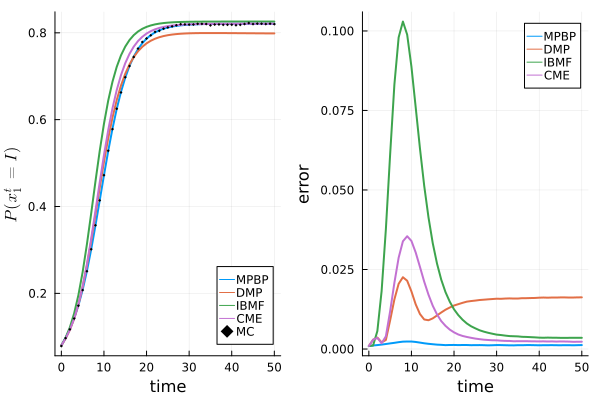

In [50]:
Plots.default(lw=2)
i = 1
pl = plot(xlabel="time", ylabel=L"P(x_{%$i}^t=I)", legend=:bottomright)
plot!(pl, 0:Δt:T, p_bp[i], label="MPBP")
plot!(pl, 0:Δt:T, p_dmp_disc[i], label="DMP")
plot!(pl, 0:Δt:T, p_ibmf_disc[i], label="IBMF")
plot!(pl, 0:Δt:T, p_cme_disc[i], label="CME")
scatter!(pl, 0:Δt:T, value.(p_mc[i]), c=:black, m=:diamond, ms=1.5, label="MC")

err_bp = [mean(abs(p_bp[i][t]-p_mc[i][t]) for i in 1:N) for t in 1:T+1]
err_dmp_disc = [mean(abs(p_dmp_disc[i][t]-p_mc[i][t]) for i in 1:N) for t in 1:T+1]
err_ibmf_disc = [mean(abs(p_ibmf_disc[i][t]-p_mc[i][t]) for i in 1:N) for t in 1:T+1]
err_cme_disc = [mean(abs(p_cme_disc[i][t]-p_mc[i][t]) for i in 1:N) for t in 1:T+1]

plot!(pl, inset=(1, bbox(0.3, 0.25, 0.5, 0.6)), subplot=2)
plot!(pl[2], xlabel="time", ylabel="error", xticks=0:10:T)
plot!(pl[2], 0:Δt:T, err_bp, label="MPBP")
plot!(pl[2], 0:Δt:T, err_dmp_disc, label="DMP")
plot!(pl[2], 0:Δt:T, err_ibmf_disc, label="IBMF")
plot!(pl[2], 0:Δt:T, err_cme_disc, label="CME")
plot(plot(pl[1]), plot(pl[2]))

In [51]:
jldsave("plot_data/sis_compare_meanfield.jld2"; T, N, c, λ, ρ, γ, p_bp, p_mc, p_ibmf_disc, p_dmp_disc,
    p_cme_disc);